# Head and Neck Cancer

To solve the question: "What's the relationship between the TP53 gene and Head and Neck Cancer when considering the influence of age?"

# 1. Data Preprocessing

In [7]:
import pandas as pd
import numpy as np

# Use raw strings to handle backslashes in file paths
clinical_data = pd.read_csv(r'C:\Users\张宇强\Desktop\TCGA.HNSC.sampleMap_HNSC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv(r'C:\Users\张宇强\Desktop\HiSeqV2_PANCAN', sep='\t', index_col=0)

In [8]:
clinical_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_HNSC,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_HNSC,_PANCAN_mutation_PANCAN,...,_GENOMIC_ID_data/public/TCGA/HNSC/miRNA_GA_gene,_GENOMIC_ID_TCGA_HNSC_hMethyl450,_GENOMIC_ID_TCGA_HNSC_RPPA,_GENOMIC_ID_TCGA_HNSC_gistic2,_GENOMIC_ID_TCGA_HNSC_PDMRNAseq,_GENOMIC_ID_TCGA_HNSC_PDMRNAseqCNV,_GENOMIC_ID_TCGA_HNSC_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_HNSC_mutation_broad_gene,_GENOMIC_ID_TCGA_HNSC_gistic2thd,_GENOMIC_ID_TCGA_HNSC_exp_HiSeqV2
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,TCGA-4P-AA8J-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,TCGA-4P-AA8J-01A-11D-A392-05,NaN,TCGA-4P-AA8J-01A-11D-A390-01,TCGA-4P-AA8J-01,TCGA-4P-AA8J-01,dd4bf12f-d19c-44ac-b878-d328d6d89fb6,TCGA-4P-AA8J-01A-11D-A391-08,TCGA-4P-AA8J-01A-11D-A390-01,dd4bf12f-d19c-44ac-b878-d328d6d89fb6
TCGA-BA-4074-01,TCGA-BA-4074-01,Squamous,C2-Squamous-like,cluster 3,Cluster 14 (HNSC),squamous c3,squamous-like c4,miRNA cluster 4,cluster 4,mutation cluster 5,...,TCGA-BA-4074-01,TCGA-BA-4074-01A-01D-1433-05,134af33b-10f9-41fd-9adc-c7476116801b,TCGA-BA-4074-01A-01D-1432-01,TCGA-BA-4074-01,TCGA-BA-4074-01,78a8e33e-fd10-4dcd-b8fd-aad93db18c45,TCGA-BA-4074-01A-01D-1434-08,TCGA-BA-4074-01A-01D-1432-01,78a8e33e-fd10-4dcd-b8fd-aad93db18c45
TCGA-BA-4075-01,TCGA-BA-4075-01,High,C2-Squamous-like,NaN,Cluster 14 (HNSC),NaN,squamous-like c4,NaN,NaN,mutation cluster 8,...,NaN,TCGA-BA-4075-01A-01D-1433-05,NaN,TCGA-BA-4075-01A-01D-1432-01,TCGA-BA-4075-01,TCGA-BA-4075-01,85034d8f-c10c-4db2-ade2-f26ea7cf2d95,TCGA-BA-4075-01A-01D-1434-08,TCGA-BA-4075-01A-01D-1432-01,85034d8f-c10c-4db2-ade2-f26ea7cf2d95
TCGA-BA-4076-01,TCGA-BA-4076-01,Squamous,C2-Squamous-like,cluster 4,Cluster 14 (HNSC),NaN,squamous-like c4,miRNA cluster 11,cluster 2,mutation cluster 8,...,TCGA-BA-4076-01,TCGA-BA-4076-01A-01D-1433-05,NaN,TCGA-BA-4076-01A-01D-1432-01,TCGA-BA-4076-01,TCGA-BA-4076-01,30dc1f2d-9d27-4c6d-830a-0947bcf79cd0,TCGA-BA-4076-01A-01D-1434-08,TCGA-BA-4076-01A-01D-1432-01,30dc1f2d-9d27-4c6d-830a-0947bcf79cd0
TCGA-BA-4077-01,TCGA-BA-4077-01,Squamous,C2-Squamous-like,cluster 4,Cluster 13 (HNSC-LUSC),NaN,squamous-like c4,miRNA cluster 11,cluster 4,mutation cluster 4,...,NaN,TCGA-BA-4077-01B-01D-1433-05,NaN,TCGA-BA-4077-01B-01D-1432-01,TCGA-BA-4077-01,TCGA-BA-4077-01,89defc7f-de01-491d-9c69-bd795b94a80c,TCGA-BA-4077-01B-01D-1434-08,TCGA-BA-4077-01B-01D-1432-01,89defc7f-de01-491d-9c69-bd795b94a80c


In [9]:
gene_data.head()

,TCGA-CR-7383-01,TCGA-CR-7398-01,TCGA-CV-A6JT-01,TCGA-HD-8635-01,TCGA-CR-6481-01,TCGA-CR-7395-01,TCGA-CV-7261-11,TCGA-BB-7863-01,TCGA-CV-7427-01,TCGA-CV-6436-01,...,TCGA-CV-7409-01,TCGA-CR-7399-01,TCGA-CV-6961-01,TCGA-CQ-6225-01,TCGA-F7-A50I-01,TCGA-QK-A6VB-01,TCGA-MT-A51X-01,TCGA-T3-A92N-01,TCGA-CR-6472-01,TCGA-D6-A6EM-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-0.856192,-1.282092,0.260608,-0.159092,-0.013492,-0.664292,1.562408,0.051108,0.274808,0.319008,...,-0.743592,-0.523792,-0.441992,-1.152392,0.123008,-1.625192,-0.318392,-0.717192,-1.364692,-0.945392
HIF3A,-3.594826,3.240674,-4.782626,-1.863526,-4.795226,-5.554726,0.445074,-4.699126,-4.951126,-2.958326,...,0.426874,-4.438926,-0.335526,3.908974,-4.796326,-2.176426,-4.973026,-4.492526,-2.466026,-3.526226
RNF17,0.758965,1.052365,-0.531035,-0.531035,-0.101935,-0.531035,-0.089635,-0.531035,0.072565,-0.531035,...,-0.531035,-0.531035,1.200165,-0.531035,-0.531035,-0.531035,0.050665,0.095765,1.929565,-0.531035
RNF10,-0.689872,-0.402972,0.369628,0.220628,-0.331672,-0.107772,0.415728,0.070628,0.035528,0.329728,...,-0.069372,0.020328,-0.364472,-0.080172,0.235628,0.263628,0.008728,0.338828,0.269928,-0.096072
RNF11,-0.347878,-0.105878,0.621322,0.905322,0.569822,0.677122,0.934322,1.217922,1.084222,0.560522,...,-0.381778,-0.630378,0.355022,-0.576678,0.348022,0.244922,0.788522,-0.551478,0.557122,-1.493778


In [10]:
gene_fullname = 'TP53 gene'
gene = 'brca'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Head and Neck Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 131 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-CR-7383-01,-0.856192,-3.594826,0.758965,-0.689872,-0.347878,-0.11751,-0.776794,0.307954,0.021601,-1.138872,...,-0.303878,-1.142117,1.578367,1.75881,-0.156177,1.494314,0.997073,-0.267095,3.371867,0.128888
TCGA-CR-7398-01,-1.282092,3.240674,1.052365,-0.402972,-0.105878,-0.60541,-1.494494,-0.319946,0.712901,-1.849972,...,2.284722,-1.587117,-0.732633,-0.79659,2.301223,1.724014,-0.959127,-1.970695,0.232467,-0.464812
TCGA-CV-A6JT-01,0.260608,-4.782626,-0.531035,0.369628,0.621322,-0.94411,-0.346594,1.155354,0.348701,-2.915972,...,-0.748878,-1.587117,1.509067,2.64031,-1.273177,2.117914,0.346873,0.141505,-1.301133,0.611688
TCGA-HD-8635-01,-0.159092,-1.863526,-0.531035,0.220628,0.905322,-0.49271,-0.909594,-0.167746,-0.423399,-2.083572,...,-0.074578,-0.108117,-0.783433,2.19491,-0.807777,1.405814,0.001173,0.042205,1.685567,0.205188
TCGA-CR-6481-01,-0.013492,-4.795226,-0.101935,-0.331672,0.569822,0.38839,-0.422294,1.573354,-0.423399,-1.414172,...,0.010622,-0.559017,2.248167,0.76051,-0.150477,0.639514,0.590773,-0.187495,3.680567,-0.189912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-QK-A6VB-01,-1.625192,-2.176426,-0.531035,0.263628,0.244922,-1.14491,-0.174094,-1.751846,-0.423399,-0.597172,...,0.842822,-1.169517,-2.051433,0.84181,0.203323,-0.117686,-0.238727,-1.397295,-1.609233,0.167288
TCGA-MT-A51X-01,-0.318392,-4.973026,0.050665,0.008728,0.788522,-0.01841,-0.176494,-0.686746,-0.423399,-2.228572,...,-0.748878,-1.587117,-0.728933,-1.28139,-0.316977,1.929314,0.618273,-0.152695,0.064667,0.226088
TCGA-T3-A92N-01,-0.717192,-4.492526,0.095765,0.338828,-0.551478,-0.69971,-0.481594,-2.595346,0.203401,-2.887072,...,-0.748878,-1.587117,-0.272233,1.40581,0.169223,1.645914,-1.701227,-0.266395,-1.411033,-0.453712
TCGA-CR-6472-01,-1.364692,-2.466026,1.929565,0.269928,0.557122,-0.30151,0.020206,0.669454,0.899401,-2.721072,...,-0.748878,-1.587117,-0.949733,-0.28069,0.591023,-0.368386,0.295073,-0.387995,1.352367,0.344588


In [11]:
merged_data = clinical_data.join(gene_data.T)

merged_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_HNSC,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_HNSC,_PANCAN_mutation_PANCAN,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,TCGA-4P-AA8J-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.409822,-1.587117,1.296567,3.68191,0.045223,2.845714,0.847073,0.594105,0.690367,0.644988
TCGA-BA-4074-01,TCGA-BA-4074-01,Squamous,C2-Squamous-like,cluster 3,Cluster 14 (HNSC),squamous c3,squamous-like c4,miRNA cluster 4,cluster 4,mutation cluster 5,...,-0.748878,-1.587117,-0.189333,1.77561,-0.278177,-0.061586,-0.298827,-0.615395,-2.848533,1.400988
TCGA-BA-4075-01,TCGA-BA-4075-01,High,C2-Squamous-like,NaN,Cluster 14 (HNSC),NaN,squamous-like c4,NaN,NaN,mutation cluster 8,...,-0.129678,-1.587117,-0.209833,2.71931,-1.013777,0.702614,-0.939227,-0.156195,-2.631833,1.666788
TCGA-BA-4076-01,TCGA-BA-4076-01,Squamous,C2-Squamous-like,cluster 4,Cluster 14 (HNSC),NaN,squamous-like c4,miRNA cluster 11,cluster 2,mutation cluster 8,...,-0.140378,-1.587117,-2.422033,0.08271,-0.033777,0.819214,0.080373,-1.184895,-3.472933,-0.027812
TCGA-BA-4077-01,TCGA-BA-4077-01,Squamous,C2-Squamous-like,cluster 4,Cluster 13 (HNSC-LUSC),NaN,squamous-like c4,miRNA cluster 11,cluster 4,mutation cluster 4,...,-0.748878,-1.587117,0.994967,1.75751,-0.387677,1.007014,-1.612027,-0.050895,-1.220433,0.335688


In [12]:
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]


threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,-24222.0,-0.471492,0.808874,-0.531035,0.233028,-0.649078,-0.88201,-0.055394,0.984354,-0.423399,...,0.409822,-1.587117,1.296567,3.68191,0.045223,2.845714,0.847073,0.594105,0.690367,0.644988
TCGA-BA-4074-01,-25282.0,-2.785992,0.931274,0.293365,-1.502772,0.422722,1.30079,-2.390494,-0.444746,0.685001,...,-0.748878,-1.587117,-0.189333,1.77561,-0.278177,-0.061586,-0.298827,-0.615395,-2.848533,1.400988
TCGA-BA-4075-01,-17951.0,-2.609592,-4.503726,1.544765,-0.871272,0.396522,1.27679,-1.614194,-1.268446,-0.423399,...,-0.129678,-1.587117,-0.209833,2.71931,-1.013777,0.702614,-0.939227,-0.156195,-2.631833,1.666788
TCGA-BA-4076-01,-14405.0,-0.524192,-4.519426,-0.531035,-0.015372,1.143422,0.26449,-1.286294,-1.745946,-0.423399,...,-0.140378,-1.587117,-2.422033,0.08271,-0.033777,0.819214,0.080373,-1.184895,-3.472933,-0.027812
TCGA-BA-4077-01,-16536.0,0.019008,-1.699326,1.237165,-0.380472,0.060722,0.88759,-0.604294,-1.223746,0.549301,...,-0.748878,-1.587117,0.994967,1.75751,-0.387677,1.007014,-1.612027,-0.050895,-1.220433,0.335688


In [13]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Head and Neck Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,-24222.0,-0.471492,0.808874,-0.531035,0.233028,-0.649078,-0.88201,-0.055394,0.984354,-0.423399,...,-1.587117,1.296567,3.68191,0.045223,2.845714,0.847073,0.594105,0.690367,0.644988,1
TCGA-BA-4074-01,-25282.0,-2.785992,0.931274,0.293365,-1.502772,0.422722,1.30079,-2.390494,-0.444746,0.685001,...,-1.587117,-0.189333,1.77561,-0.278177,-0.061586,-0.298827,-0.615395,-2.848533,1.400988,1
TCGA-BA-4075-01,-17951.0,-2.609592,-4.503726,1.544765,-0.871272,0.396522,1.27679,-1.614194,-1.268446,-0.423399,...,-1.587117,-0.209833,2.71931,-1.013777,0.702614,-0.939227,-0.156195,-2.631833,1.666788,1
TCGA-BA-4076-01,-14405.0,-0.524192,-4.519426,-0.531035,-0.015372,1.143422,0.26449,-1.286294,-1.745946,-0.423399,...,-1.587117,-2.422033,0.08271,-0.033777,0.819214,0.080373,-1.184895,-3.472933,-0.027812,1
TCGA-BA-4077-01,-16536.0,0.019008,-1.699326,1.237165,-0.380472,0.060722,0.88759,-0.604294,-1.223746,0.549301,...,-1.587117,0.994967,1.75751,-0.387677,1.007014,-1.612027,-0.050895,-1.220433,0.335688,1


In [15]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

# 2. Preliminary analysis


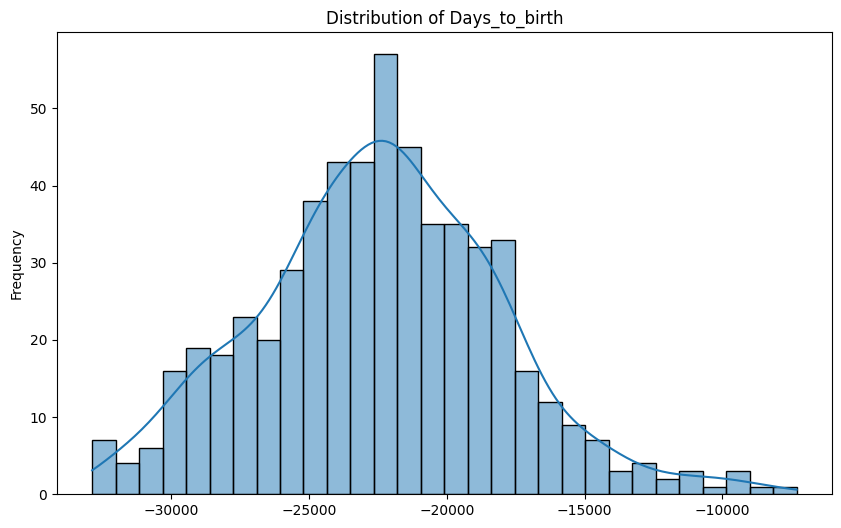

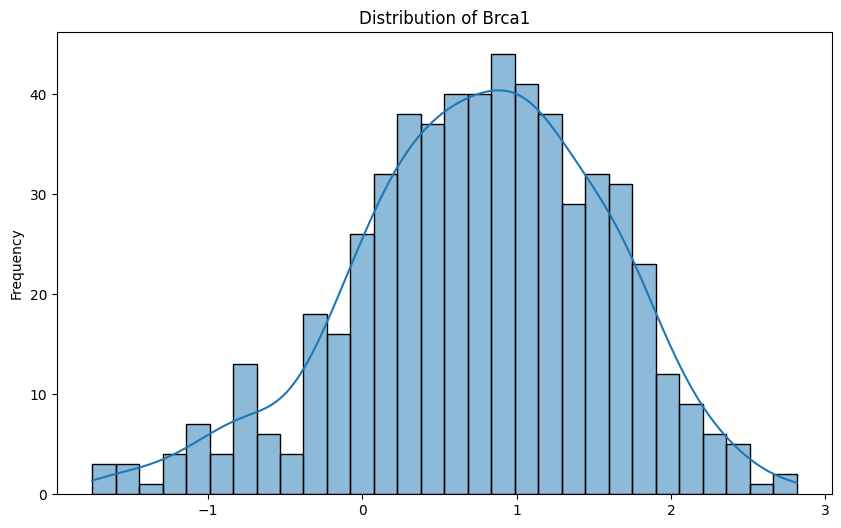

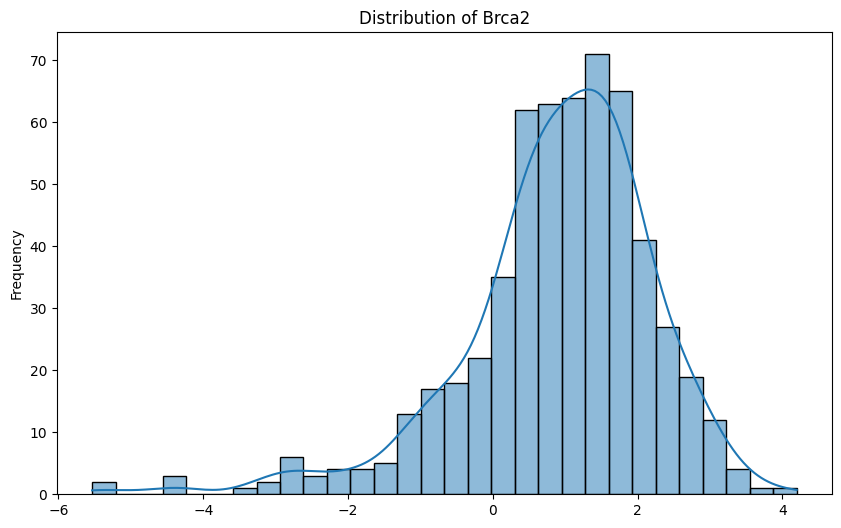

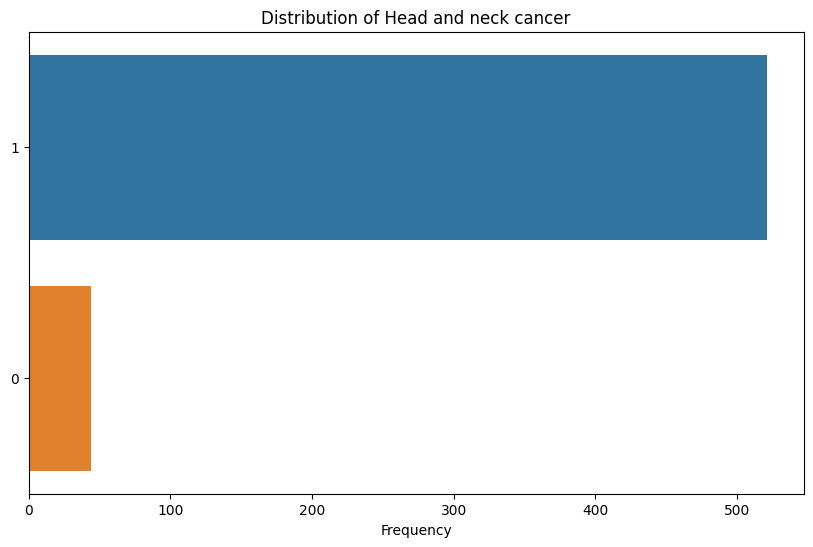

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

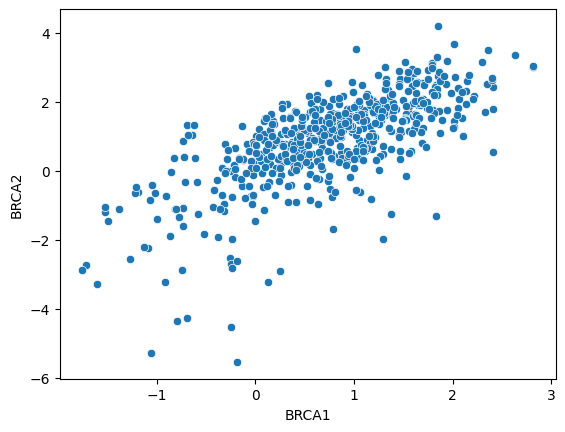

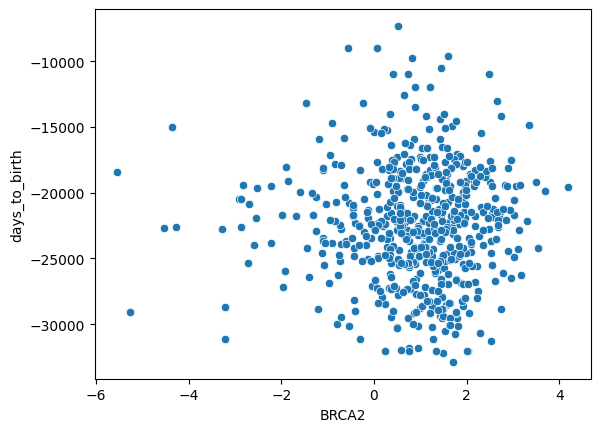

In [17]:
sns.scatterplot(data=merged_data, x='BRCA1', y='BRCA2')
plt.show()
sns.scatterplot(data=merged_data, x='BRCA2', y=condition_col)
plt.show()

In [18]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Head and Neck Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J-01,66,-0.471492,0.808874,-0.531035,0.233028,-0.649078,-0.88201,-0.055394,0.984354,-0.423399,...,-1.587117,1.296567,3.68191,0.045223,2.845714,0.847073,0.594105,0.690367,0.644988,1
TCGA-BA-4074-01,69,-2.785992,0.931274,0.293365,-1.502772,0.422722,1.30079,-2.390494,-0.444746,0.685001,...,-1.587117,-0.189333,1.77561,-0.278177,-0.061586,-0.298827,-0.615395,-2.848533,1.400988,1
TCGA-BA-4075-01,49,-2.609592,-4.503726,1.544765,-0.871272,0.396522,1.27679,-1.614194,-1.268446,-0.423399,...,-1.587117,-0.209833,2.71931,-1.013777,0.702614,-0.939227,-0.156195,-2.631833,1.666788,1
TCGA-BA-4076-01,39,-0.524192,-4.519426,-0.531035,-0.015372,1.143422,0.26449,-1.286294,-1.745946,-0.423399,...,-1.587117,-2.422033,0.08271,-0.033777,0.819214,0.080373,-1.184895,-3.472933,-0.027812,1
TCGA-BA-4077-01,45,0.019008,-1.699326,1.237165,-0.380472,0.060722,0.88759,-0.604294,-1.223746,0.549301,...,-1.587117,0.994967,1.75751,-0.387677,1.007014,-1.612027,-0.050895,-1.220433,0.335688,1


In [19]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        binary_predictions = (predictions > 0.5).astype(int)

        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

d:\temp\temp\ipykernel_18220\1545064521.py:12: RuntimeWarning: invalid value encountered in true_divide
  X = (X - mean) / std
D:\Anaconda3\lib\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: invalid value encountered in true_divide
  ts = beta / np.sqrt(var * sigma)
D:\Anaconda3\lib\site-packages\sparse_lmm\VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.7070561516171978


In [20]:
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [21]:
gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For brca:
BRCA1: Coefficient = 0.014927403152136875, p-value = 0.32968853955106814
BRCA2: Coefficient = -0.008295864052395624, p-value = 0.6107517710810086

For age:
age: Coefficient = -0.011133297788425145, p-value = 0.04146579782611962



In [22]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between TP53 gene and Head and Neck Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the TP53 gene and Head and Neck Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the TP53 gene and Head and Neck Cancer when considering the influence of age.




# 4.Discussion

In [23]:
threshold = 0.2
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: BRCA1
Coefficient is positive, and it is not statistically significant (p-value >= 0.2).

Variable: BRCA2
Coefficient is negative, and it is not statistically significant (p-value >= 0.2).

Variable: age
Coefficient is negative, and it is statistically significant (p-value < 0.2).


